**<font color='blue' size='5'>Import libraries</font>**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Owner\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


**<font color='blue' size='5'>Import and Explore Datasets</font>**

<font color='red' size='3'>Cab_data</font>

In [2]:
cab_data=pd.read_csv("Cab_data.csv")
#cab_data.head()
#len(cab_data)
# Convert "Date of Travel" to meaningful date objects
origin_date = pd.to_datetime('1900-01-01')  # Define the origin date 1900-01-01

cab_data['Date of Travel'] = origin_date + pd.to_timedelta(cab_data['Date of Travel'].astype(int), unit='D')

# Check the DataFrame after conversion
print(cab_data)

        Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-10    Pink Cab     ATLANTA GA   
1             10000012     2016-01-08    Pink Cab     ATLANTA GA   
2             10000013     2016-01-04    Pink Cab     ATLANTA GA   
3             10000014     2016-01-09    Pink Cab     ATLANTA GA   
4             10000015     2016-01-05    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-10  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-06  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-07  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-07  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-01-04  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1              28.62         358.52      334.8540  
2               9.04       

In [3]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [4]:
# Check for duplicate rows
duplicate_rows = cab_data[cab_data.duplicated()]

# Print the duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [5]:
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,2017-08-19 01:37:55.042293760,22.567254,423.443311,286.190113
min,1.000001e+07,2016-01-04 00:00:00,1.900000,15.600000,19.000000
25%,1.011081e+07,2016-11-25 00:00:00,12.000000,206.437500,151.200000
50%,1.022104e+07,2017-09-12 00:00:00,22.440000,386.360000,282.480000
75%,1.033094e+07,2018-05-14 00:00:00,32.960000,583.660000,413.683200
max,1.044011e+07,2019-01-02 00:00:00,48.000000,2048.030000,691.200000
std,1.268058e+05,NaN,12.233526,274.378911,157.993661


<font color='red' size='3'>City</font>

In [6]:
city=pd.read_csv("City.csv")
print(city)

                City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021 


In [7]:
# Convert 'Population' and 'Users' columns to int
city['Population'] = pd.to_numeric(city['Population'].str.replace(',', ''), errors='coerce').astype('Int64')
city['Users'] = pd.to_numeric(city['Users'].str.replace(',', ''), errors='coerce').astype('Int64')


In [8]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     Int64 
 2   Users       20 non-null     Int64 
dtypes: Int64(2), object(1)
memory usage: 648.0+ bytes


In [9]:
# Check for duplicate rows
duplicate_rows = city[city.duplicated()]

# Print the duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [10]:
city.describe()

,Population,Users
count,20.0,20.0
mean,1231592.0,64520.65
std,1740126.699785,83499.375289
min,248968.0,3643.0
25%,608637.25,11633.25
50%,784559.0,23429.0
75%,1067041.0,91766.0
max,8405837.0,302149.0


<font color='red' size='3'>customer_id</font>

In [11]:
customer_id=pd.read_csv("Customer_ID.csv")
print(customer_id)

       Customer ID  Gender  Age  Income (USD/Month)
0            29290    Male   28               10813
1            27703    Male   27                9237
2            28712    Male   53               11242
3            28020    Male   23               23327
4            27182    Male   33                8536
...            ...     ...  ...                 ...
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

[49171 rows x 4 columns]


In [12]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
# Check for duplicate rows
duplicate_rows = customer_id[customer_id.duplicated()]

# Print the duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [14]:
customer_id.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


<font color='red' size='3'>transaction_id</font>

In [15]:
transaction_id=pd.read_csv("Transaction_ID.csv")
print(transaction_id)


        Transaction ID  Customer ID Payment_Mode
0             10000011        29290         Card
1             10000012        27703         Card
2             10000013        28712         Cash
3             10000014        28020         Cash
4             10000015        27182         Card
...                ...          ...          ...
440093        10440104        53286         Cash
440094        10440105        52265         Cash
440095        10440106        52175         Card
440096        10440107        52917         Card
440097        10440108        51587         Card

[440098 rows x 3 columns]


In [16]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [17]:
# Check for duplicate rows
duplicate_rows = transaction_id[transaction_id.duplicated()]

# Print the duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [18]:
transaction_id.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


**<font color='blue' size='5'>Merge Datasets</font>**

In [19]:
# Join dataframes using common columns
merged_df = cab_data.merge(city, on='City').merge(transaction_id, on='Transaction ID').merge(customer_id, on='Customer ID')

# Print the resulting dataframe
print(merged_df)

        Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-10    Pink Cab     ATLANTA GA   
1             10351127     2018-07-23  Yellow Cab     ATLANTA GA   
2             10412921     2018-11-25  Yellow Cab     ATLANTA GA   
3             10000012     2016-01-08    Pink Cab     ATLANTA GA   
4             10320494     2018-04-23  Yellow Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10307228     2018-03-05  Yellow Cab  WASHINGTON DC   
359388        10319775     2018-04-15  Yellow Cab  WASHINGTON DC   
359389        10347676     2018-07-08  Yellow Cab  WASHINGTON DC   
359390        10358624     2018-08-04  Yellow Cab  WASHINGTON DC   
359391        10370709     2018-09-01  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Population   Users  \
0              30.45         370.95      313.6350      814885   24701   
1              26.19         598.70  

In [20]:
merged_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392,359392.000000,359392.000000,359392.000000,359392.0,359392.0,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,2017-08-19 01:37:55.042293504,22.567254,423.443311,286.190113,3132198.044127,158365.582267,19191.652115,35.336705,15048.822937
min,1.000001e+07,2016-01-04 00:00:00,1.900000,15.600000,19.000000,248968.0,3643.0,1.000000,18.000000,2000.000000
25%,1.011081e+07,2016-11-25 00:00:00,12.000000,206.437500,151.200000,671238.0,80021.0,2705.000000,25.000000,8424.000000
50%,1.022104e+07,2017-09-12 00:00:00,22.440000,386.360000,282.480000,1595037.0,144132.0,7459.000000,33.000000,14685.000000
75%,1.033094e+07,2018-05-14 00:00:00,32.960000,583.660000,413.683200,8405837.0,302149.0,36078.000000,42.000000,21035.000000
max,1.044011e+07,2019-01-02 00:00:00,48.000000,2048.030000,691.200000,8405837.0,302149.0,60000.000000,65.000000,35000.000000
std,1.268058e+05,NaN,12.233526,274.378911,157.993661,3315194.391534,100850.05102,21012.412463,12.594234,7969.409482


In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Population          359392 non-null  Int64         
 8   Users               359392 non-null  Int64         
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

**<font color='blue' size='5'>Exploratory Data Analysis</font>**

<font color='red' size='4'>Correlation Heatmap</font>

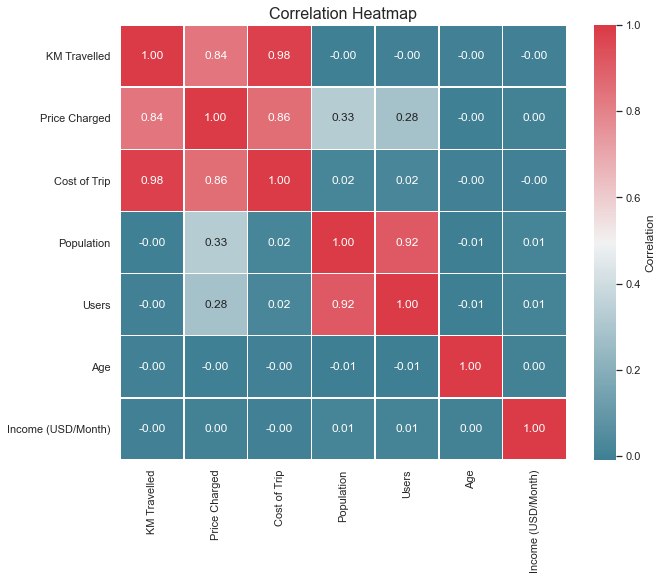

In [22]:
corr_matrix = merged_df[['KM Travelled',
       'Price Charged', 'Cost of Trip', 'Population', 'Users', 'Age', 'Income (USD/Month)']].corr()
# Create a stylish correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1)  # Adjust font size
sns.set_style("whitegrid")  # Set background style

# Customize the heatmap colors
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create the heatmap with annotations and styling
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, cbar_kws={'label': 'Correlation'}, linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)

# Rotate the tick labels for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [23]:
merged_df['Price/KM']=merged_df['Price Charged']/merged_df['KM Travelled']

In [24]:
merged_df['Users/Population']=(merged_df['Users']/merged_df['Population'])*100

In [25]:
# Calculate profit for each transaction
merged_df['Profit'] = merged_df['Price Charged'] - merged_df['Cost of Trip']

<font color='red' size='4'>Age Distribution</font>

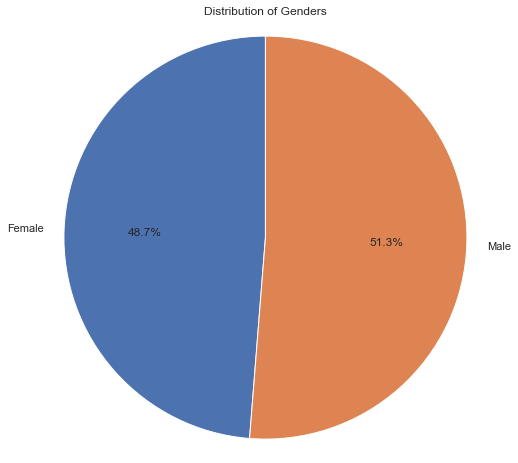

In [26]:
profit_margin_by_gender = merged_df.groupby('Gender')['Profit'].mean()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(profit_margin_by_gender, labels=profit_margin_by_gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Genders')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()

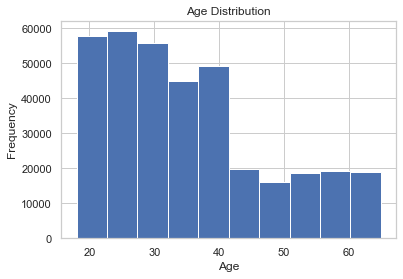

In [27]:
import matplotlib.pyplot as plt
merged_df['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Profit'>

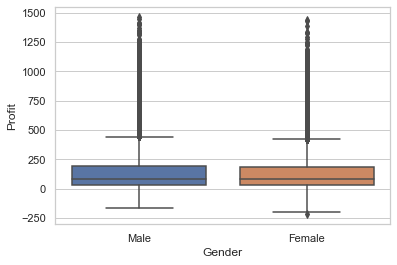

In [28]:
sns.boxplot(x='Gender', y='Profit', data=merged_df)

<font color='red' size='4'>distribution of payment modes</font>

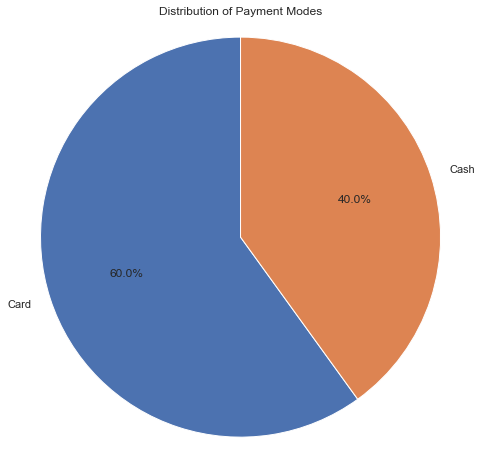

In [29]:
# Calculate the percentage distribution of payment modes
payment_mode_counts = merged_df['Payment_Mode'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_mode_counts, labels=payment_mode_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Payment Modes')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()


In [30]:
merged_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Price/KM,Users/Population,Profit
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813,12.182266,3.031225,57.3150
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,22.859870,3.031225,281.2772
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813,18.614571,3.031225,194.6480
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237,12.526904,3.031225,23.6660
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237,19.821330,3.031225,253.9808


<font color='red' size='4'>Explore by Company</font>

In [31]:
# Calculate the count of records for each company
company_count = merged_df['Company'].value_counts()

# Calculate total revenue for each company
revenue_by_company = merged_df.groupby('Company')['Price Charged'].sum()

# Calculate average profit margin for each company
profit_margin_by_company = merged_df.groupby('Company')['Profit'].mean()

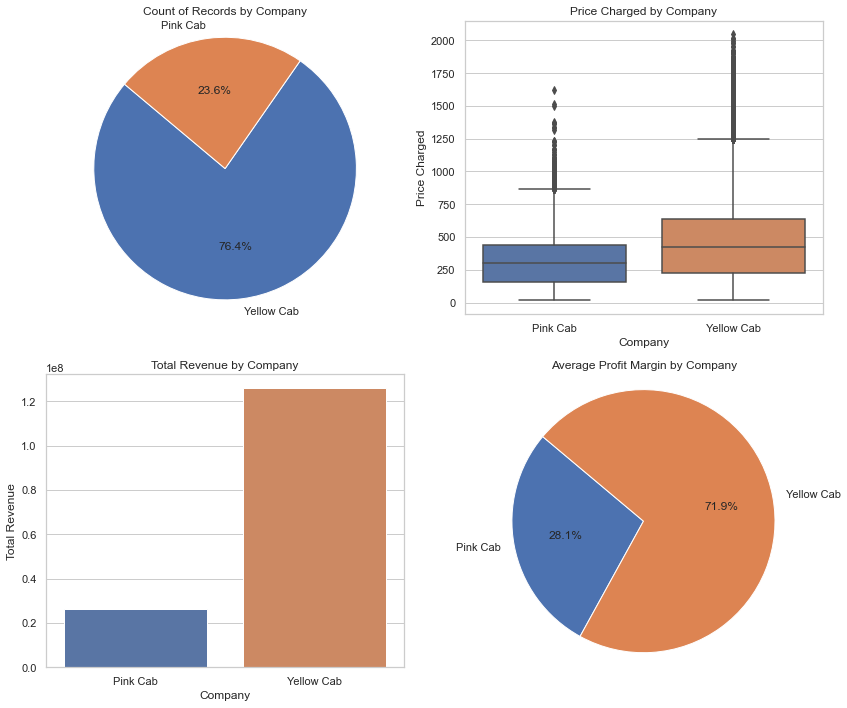

In [32]:
# Create subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Count of Records by Company (Pie Chart)
axes[0, 0].pie(company_count.values, labels=company_count.index, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('Count of Records by Company')
axes[0, 0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot 2: Boxplot for Price Charged by Company
sns.boxplot(x='Company', y='Price Charged', data=merged_df, ax=axes[0, 1])
axes[0, 1].set_xlabel('Company')
axes[0, 1].set_ylabel('Price Charged')
axes[0, 1].set_title('Price Charged by Company')

# Plot 3: Total Revenue by Company (Bar Plot)
sns.barplot(x=revenue_by_company.index, y=revenue_by_company.values, ax=axes[1, 0])
axes[1, 0].set_title('Total Revenue by Company')
axes[1, 0].set_xlabel('Company')
axes[1, 0].set_ylabel('Total Revenue')

# Plot 4: Average Profit Margin by Company (Pie Chart)
axes[1, 1].pie(profit_margin_by_company, labels=profit_margin_by_company.index, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('Average Profit Margin by Company')
axes[1, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


<font color='red' size='4'>Explore by Day of the Week and Company</font>

In [33]:
# Convert the "Date of Travel" column to a datetime data type
merged_df['Date of Travel'] = pd.to_datetime(merged_df['Date of Travel'])

# Extract day of the week and month into separate columns
merged_df['Day of the Week'] = merged_df['Date of Travel'].dt.strftime('%a')  # Abbreviated day name (e.g., 'Mon', 'Tue')
merged_df['Month'] = merged_df['Date of Travel'].dt.strftime('%b')  # Abbreviated month name (e.g., 'Jan', 'Feb')
# Display the DataFrame with the new columns
merged_df.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Price/KM,Users/Population,Profit,Day of the Week,Month
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813,12.182266,3.031225,57.3150,Sun,Jan
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,22.859870,3.031225,281.2772,Mon,Jul
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813,18.614571,3.031225,194.6480,Sun,Nov
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237,12.526904,3.031225,23.6660,Fri,Jan
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237,19.821330,3.031225,253.9808,Mon,Apr


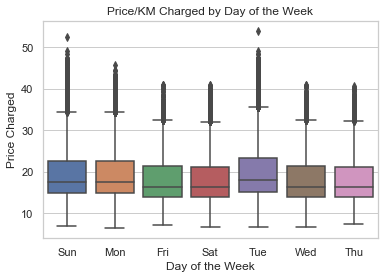

In [34]:
import seaborn as sns
sns.boxplot(x='Day of the Week', y='Price/KM', data=merged_df)
plt.xlabel('Day of the Week')
plt.ylabel('Price Charged')
plt.title('Price/KM Charged by Day of the Week')
plt.show()

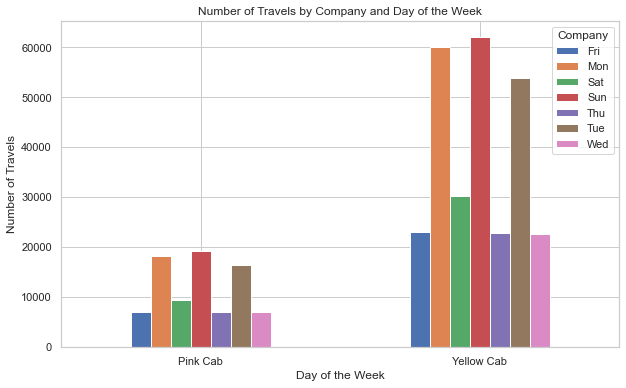

In [35]:
# Group the data by company and day of the week, and count the number of travels
company_day_counts = merged_df.groupby(['Company', 'Day of the Week']).size().unstack(fill_value=0)

# Plot the data
ax = company_day_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Travels by Company and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Travels')
plt.xticks(rotation=0)
plt.legend(title='Company')

plt.show()


<font color='red' size='4'>Explore by Month and Company</font>

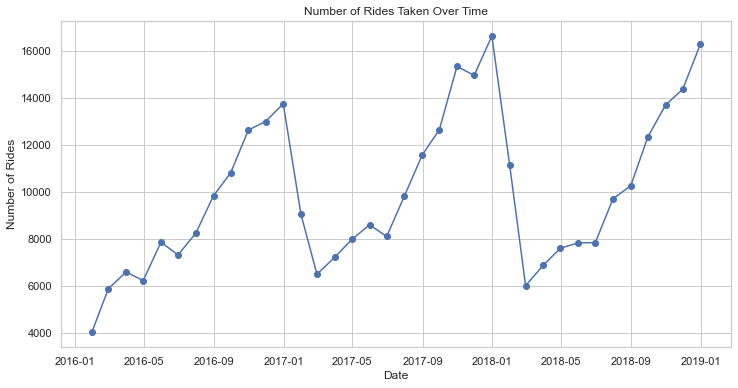

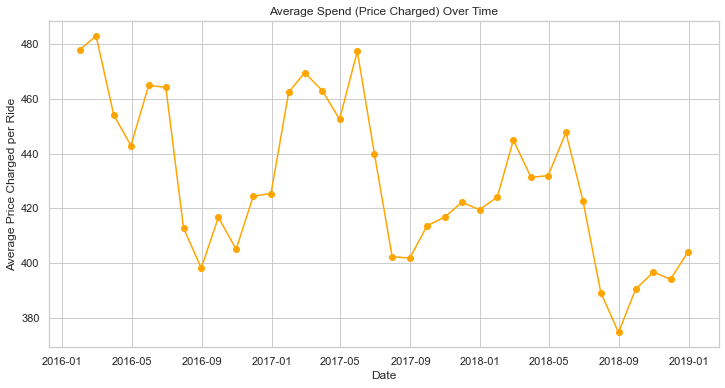

In [36]:
# Convert 'Date of Travel' to datetime and set it as the index
#merged_df['Date of Travel'] = pd.to_datetime(merged_df['Date of Travel'])
merged_df.set_index('Date of Travel', inplace=True)

# Filter data for the desired time period
start_date = '2016-01-01'
end_date = '2018-12-31'
filtered_df = merged_df[(merged_df.index >= start_date) & (merged_df.index <= end_date)]

# Resample data by month and count the number of rides
rides_per_month = filtered_df.resample('M')['Transaction ID'].count()
average_spend_per_ride = filtered_df.resample('M')['Price Charged'].mean()

# Plot the number of rides over time
plt.figure(figsize=(12, 6))
plt.plot(rides_per_month.index.to_numpy(), rides_per_month.to_numpy(), marker='o', linestyle='-')
plt.title('Number of Rides Taken Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()

# Plot the average spend over time
plt.figure(figsize=(12, 6))
plt.plot(average_spend_per_ride.index.to_numpy(), average_spend_per_ride.to_numpy(), marker='o', linestyle='-', color='orange')
plt.title('Average Spend (Price Charged) Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price Charged per Ride')
plt.grid(True)
plt.show()

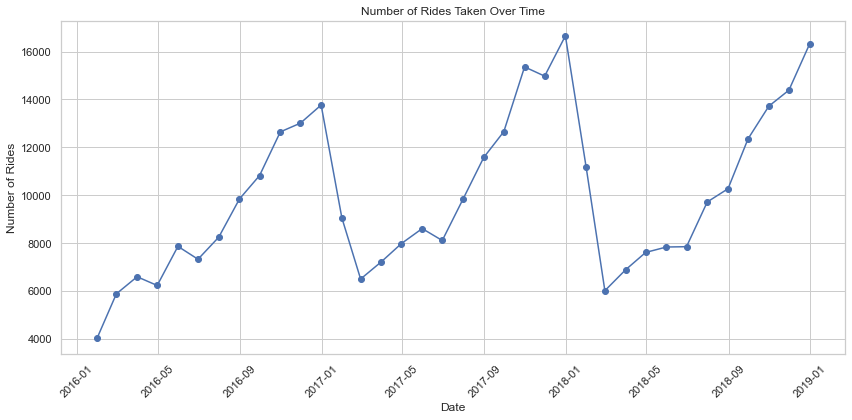

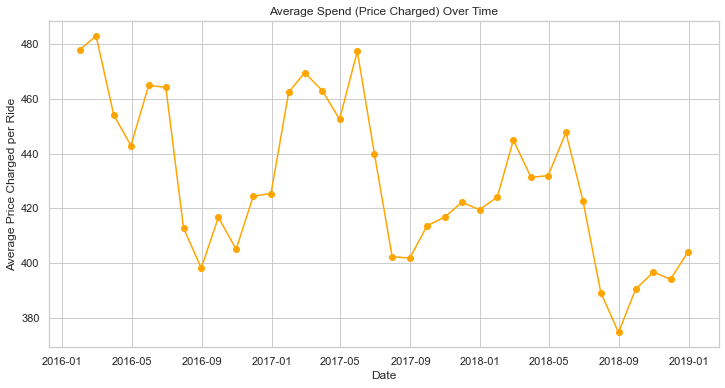

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the index and values to NumPy arrays
x = rides_per_month.index.to_numpy()
y = rides_per_month.to_numpy()

# Plot the number of rides over time
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Number of Rides Taken Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Convert the index and values to NumPy arrays
z = average_spend_per_ride.index.to_numpy()
r = average_spend_per_ride.to_numpy()

# Plot the average spend over time
plt.figure(figsize=(12, 6))
plt.plot(z, r, marker='o', linestyle='-', color='orange')
plt.title('Average Spend (Price Charged) Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price Charged per Ride')
plt.grid(True)
plt.show()


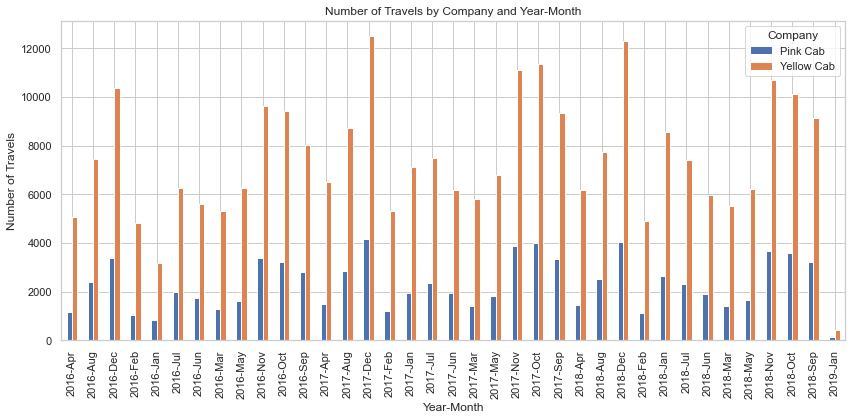

In [38]:
# Sort the months in chronological order
month_order = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]
merged_df['Month'] = pd.Categorical(merged_df['Month'], categories=month_order, ordered=True)

# Create a new column 'YearMonth' that combines year and month
merged_df=merged_df.reset_index()
#print(df.columns)
merged_df['YearMonth'] = merged_df['Date of Travel'].dt.strftime('%Y-%b')

# Group the data by company and YearMonth, and count the number of travels
company_yearmonth_counts = merged_df.groupby(['Company', 'YearMonth']).size().unstack(fill_value=0)
#company_yearmonth_counts = filtered_df.groupby(['Company', 'Date of Travel']).count()

# Create line plots
fig, axes = plt.subplots(figsize=(12, 6))
company_yearmonth_counts.T.plot(kind='bar', ax=axes)
axes.set_title('Number of Travels by Company and Year-Month')
axes.set_xlabel('Year-Month')
axes.set_ylabel('Number of Travels')
plt.legend(title='Company', loc='upper right')
plt.tight_layout()
plt.show()


<font color='red' size='4'>Explore by Year and Company</font>

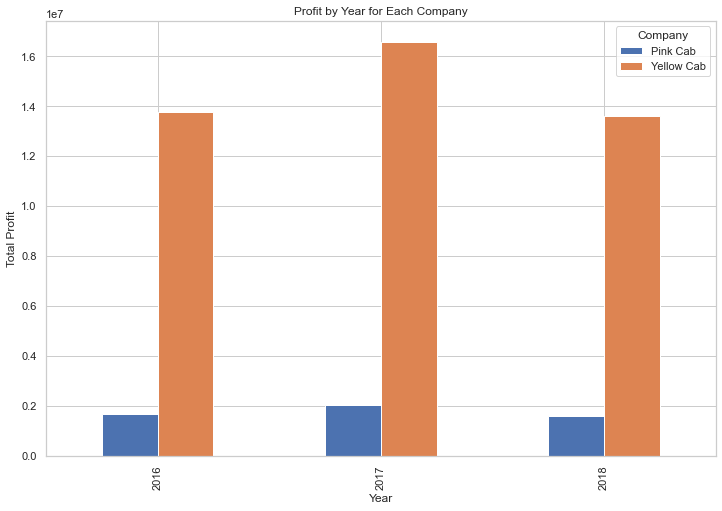

In [39]:
merged_df['Year'] = pd.to_datetime(merged_df['Date of Travel']).dt.year
profit_by_year_company = merged_df.groupby(['Year', 'Company'])['Profit'].sum().unstack()
# Filter the data to include only transactions from 2016, 2017, and 2018
filtered_data = profit_by_year_company.loc[[2016, 2017, 2018]]
filtered_data.plot(kind='bar', figsize=(12, 8))
# Set the x-axis ticks to display only 2016, 2017, and 2018
#ax.set_xticks(range(3))
#ax.set_xticklabels(['2016', '2017', '2018'])
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Profit by Year for Each Company')
plt.legend(title='Company')
plt.show()


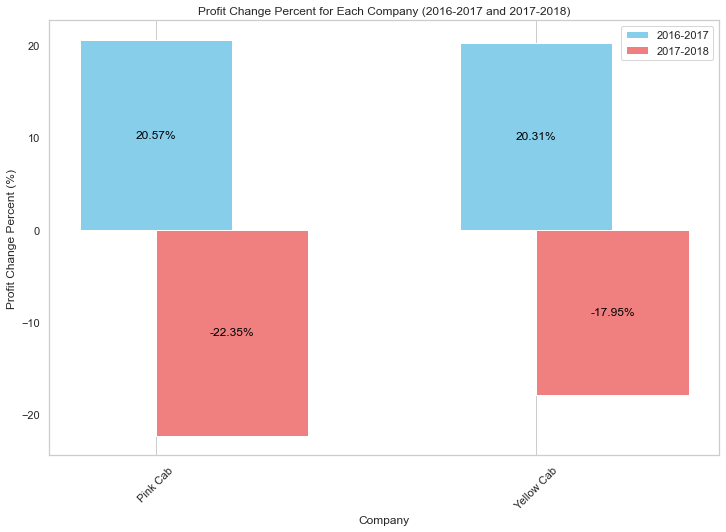

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already executed the code to create profit_by_year_company DataFrame

# Filter the data to include only transactions from 2016, 2017, and 2018
filtered_data = profit_by_year_company.loc[[2016, 2017, 2018]]

# Calculate profit change percent from 2016 to 2017 and from 2017 to 2018
profit_2016 = filtered_data.loc[2016]
profit_2017 = filtered_data.loc[2017]
profit_2018 = filtered_data.loc[2018]

profit_change_16_to_17 = ((profit_2017 - profit_2016) / profit_2016) * 100
profit_change_17_to_18 = ((profit_2018 - profit_2017) / profit_2017) * 100

# Convert company names to strings for plotting
companies = profit_change_16_to_17.index.astype(str)

# Create a bar plot to show profit change percent for each company
plt.figure(figsize=(12, 8))
width = 0.4

# Plot profit changes with bars extending in both directions
bars1 = plt.bar(companies, profit_change_16_to_17.values, width=width, label='2016-2017', color='skyblue', align='center')
bars2 = plt.bar(companies, profit_change_17_to_18.values, width=width, label='2017-2018', color='lightcoral', align='edge')

plt.xlabel('Company')
plt.ylabel('Profit Change Percent (%)')
plt.title('Profit Change Percent for Each Company (2016-2017 and 2017-2018)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')

# Add tags (labels) above each bar
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    
    plt.text(bar1.get_x() + bar1.get_width() / 2, height1 / 2, f'{height1:.2f}%', ha='center', va='center', color='black')
    plt.text(bar2.get_x() + bar2.get_width() / 2, height2 / 2, f'{height2:.2f}%', ha='center', va='center', color='black')

plt.show()


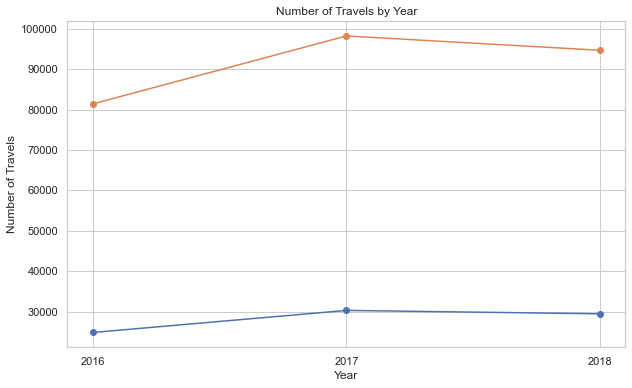

In [41]:
# Group the data by year and calculate the total number of users for each year
users_by_year = merged_df.groupby(['Year', 'Company']).size().unstack(fill_value=0)
filtered_data_user = users_by_year.loc[[2016, 2017, 2018]]
# Create a line plot to visualize the number of users by year
plt.figure(figsize=(10, 6))
# Convert the index and values to NumPy arrays
x = filtered_data_user.index.to_numpy()
y = filtered_data_user.to_numpy()
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Travels')
plt.title('Number of Travels by Year')
plt.grid(True)
plt.xticks(filtered_data_user.index)
plt.show()

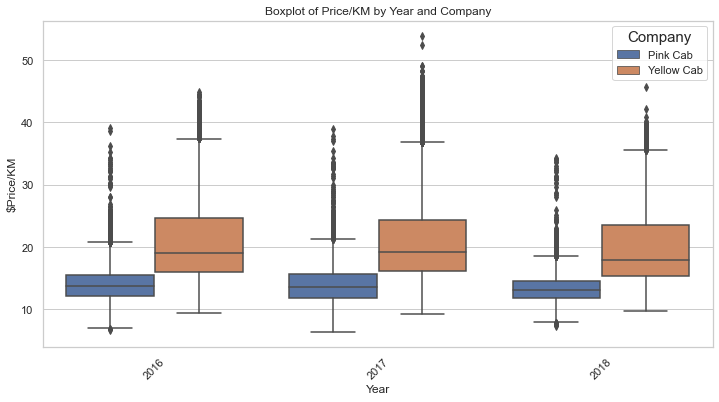

In [42]:
# Filter the DataFrame to select relevant columns and specific years
years_to_include = [2016, 2017, 2018]
filtered_data = merged_df[merged_df['Year'].isin(years_to_include)]
# Filter the DataFrame to select relevant columns
data_to_plot = filtered_data[['Year', 'Company', 'Price/KM']]

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Price/KM', hue='Company', data=data_to_plot)
plt.title('Boxplot of Price/KM by Year and Company')
plt.xlabel('Year')
plt.ylabel('$Price/KM')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Company', title_fontsize='15')
plt.show()

<font color='red' size='4'>Explore by City and Company</font>

In [43]:
city_avg_user = merged_df.groupby('City')['Users/Population'].mean().reset_index()
city_avg_price = merged_df.groupby('City')['Price/KM'].mean().reset_index()

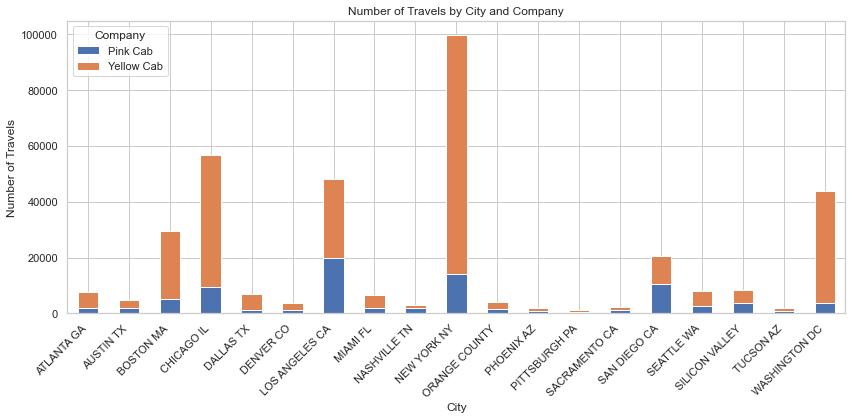

In [75]:
import matplotlib.pyplot as plt

# Calculate the number of travels by city and company
travels_by_city_company = merged_df.groupby(['City', 'Company']).size().unstack(fill_value=0)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the stacked bar chart
travels_by_city_company.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
ax.set_xlabel('City')
ax.set_ylabel('Number of Travels')
ax.set_title('Number of Travels by City and Company')
# Rotate the bar labels (city names) by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# Show the plot
#plt.xticks(rotation=45)
plt.legend(title='Company', loc='upper left')
plt.tight_layout()
plt.show()


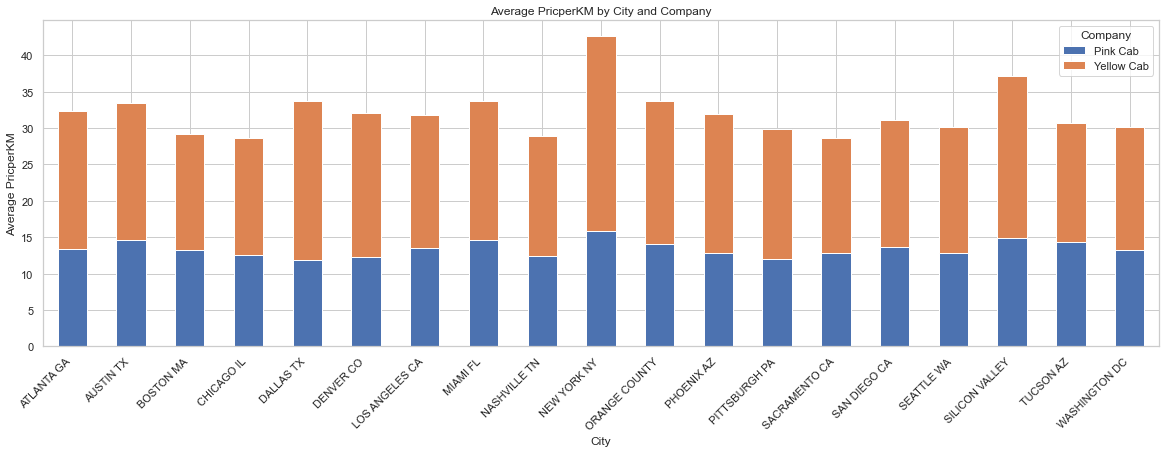

In [45]:
# Calculate average profit per trip for each city and company
city_company_PriceperKM = merged_df.groupby(['City', 'Company'])['Price/KM'].mean().reset_index()

# Pivot the data for plotting
pivot_df = city_company_PriceperKM.pivot(index='City', columns='Company', values='Price/KM')

# Plot the data as a grouped bar chart
ax = pivot_df.plot(kind='bar', stacked= True, figsize=(20, 6))

plt.title('Average PricperKM by City and Company')
plt.xlabel('City')
plt.ylabel('Average PricperKM')
# Rotate the bar labels (city names) by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.legend(title='Company', loc='upper right')

plt.show()

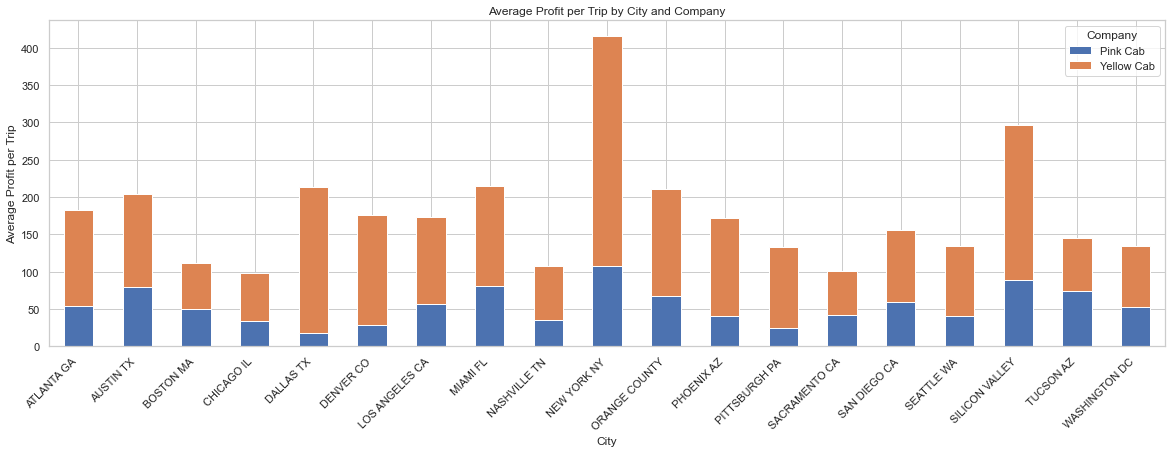

In [46]:
# Calculate average profit per trip for each city and company
city_company_profit = merged_df.groupby(['City', 'Company'])['Profit'].mean().reset_index()

# Pivot the data for plotting
pivot_df = city_company_profit.pivot(index='City', columns='Company', values='Profit')

# Plot the data as a grouped bar chart
ax = pivot_df.plot(kind='bar', stacked= True, figsize=(20, 6))

plt.title('Average Profit per Trip by City and Company')
plt.xlabel('City')
plt.ylabel('Average Profit per Trip')
# Rotate the bar labels (city names) by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.legend(title='Company', loc='upper right')

plt.show()


In [47]:
merged_df

,Date of Travel,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,...,Gender,Age,Income (USD/Month),Price/KM,Users/Population,Profit,Day of the Week,Month,YearMonth,Year
0,2016-01-10,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,...,Male,28,10813,12.182266,3.031225,57.3150,Sun,Jan,2016-Jan,2016
1,2018-07-23,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,...,Male,28,10813,22.859870,3.031225,281.2772,Mon,Jul,2018-Jul,2018
2,2018-11-25,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,...,Male,28,10813,18.614571,3.031225,194.6480,Sun,Nov,2018-Nov,2018
3,2016-01-08,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,...,Male,27,9237,12.526904,3.031225,23.6660,Fri,Jan,2016-Jan,2016
4,2018-04-23,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,...,Male,27,9237,19.821330,3.031225,253.9808,Mon,Apr,2018-Apr,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,2018-03-05,10307228,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,418859,127001,51406,...,Female,29,6829,17.420052,30.320705,143.6180,Mon,Mar,2018-Mar,2018
359388,2018-04-15,10319775,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,418859,127001,51406,...,Female,29,6829,18.935574,30.320705,23.0464,Sun,Apr,2018-Apr,2018
359389,2018-07-08,10347676,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,418859,127001,51406,...,Female,29,6829,14.150469,30.320705,-5.8540,Sun,Jul,2018-Jul,2018
359390,2018-08-04,10358624,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,418859,127001,51406,...,Female,29,6829,12.979348,30.320705,-6.0900,Sat,Aug,2018-Aug,2018


In [64]:
import pandas as pd


# Calculate the total profit for each city
total_profit_by_city = merged_df.groupby(['City', 'Company'])['Profit'].sum()

# Calculate profit per capita for each city
profit_per_capita = total_profit_by_city / merged_df.groupby(['City', 'Company'])['Population'].max()
# Group the data by 'City' and count the number of travels in each city
number_of_travels_by_city = merged_df.groupby('City')['Transaction ID'].count()

# Calculate average profit per ride for each city
average_profit_per_ride = total_profit_by_city / number_of_travels_by_city

# Combine the calculated metrics into a DataFrame
city_metrics = pd.DataFrame({
    'Total Profit': total_profit_by_city,
    'Profit per Capita': profit_per_capita,
    'Average Profit per Ride': average_profit_per_ride
}).reset_index(drop=False)

# Sort the DataFrame by the chosen metric to find the most impressive cities
impressive_cities = city_metrics.sort_values(by='Total Profit', ascending=False).reset_index(drop=True)
impressive_cities.head(10)

,City,Company,Total Profit,Profit per Capita,Average Profit per Ride
0,NEW YORK NY,Yellow Cab,2.645108e+07,3.146752,264.815345
1,WASHINGTON DC,Yellow Cab,3.299104e+06,7.876407,75.430501
2,LOS ANGELES CA,Yellow Cab,3.285977e+06,2.060126,68.410813
3,CHICAGO IL,Yellow Cab,3.068591e+06,1.569507,54.191451
4,NEW YORK NY,Pink Cab,1.511474e+06,0.179812,15.132146
5,BOSTON MA,Yellow Cab,1.506718e+06,6.051852,50.744900
6,LOS ANGELES CA,Pink Cab,1.125732e+06,0.705772,23.436639
7,DALLAS TX,Yellow Cab,1.104003e+06,1.170849,157.332643
8,SILICON VALLEY,Yellow Cab,9.764547e+05,0.829184,114.620817
9,SAN DIEGO CA,Yellow Cab,9.492737e+05,0.989541,46.333156


**<font color='blue' size='5'>Models:</font>**

In [66]:
city_df = merged_df.groupby(['City', 'Company'])['Price/KM'].mean().reset_index()
# Group the data by 'City' and count the number of travels in each city
df_n = merged_df.groupby(['City', 'Company'])['Transaction ID'].count().reset_index()
# Calculate the total profit for each city
df_profit = merged_df.groupby(['City', 'Company'])['Profit'].sum().reset_index()
df=city_df.merge(df_n, on=['City', 'Company']).merge(df_profit, on=['City', 'Company'])
df.columns=['City', 'Company', 'Price/KM', 'Number of Travels', 'Profit']
df

,City,Company,Price/KM,Number of Travels,Profit
0,ATLANTA GA,Pink Cab,13.412805,1762,9.605008e+04
1,ATLANTA GA,Yellow Cab,18.986825,5795,7.463828e+05
2,AUSTIN TX,Pink Cab,14.600816,1868,1.474453e+05
3,AUSTIN TX,Yellow Cab,18.769458,3028,3.792557e+05
4,BOSTON MA,Pink Cab,13.233061,5186,2.620017e+05
5,BOSTON MA,Yellow Cab,15.933131,24506,1.506718e+06
6,CHICAGO IL,Pink Cab,12.504731,9361,3.187225e+05
7,CHICAGO IL,Yellow Cab,16.061629,47264,3.068591e+06
8,DALLAS TX,Pink Cab,11.811987,1380,2.473011e+04
9,DALLAS TX,Yellow Cab,21.849743,5637,1.104003e+06


In [67]:
import pandas as pd
import statsmodels.api as sm


# Separate data for Pink Cab and Yellow Cab
pink_cab_data = df[df['Company'] == 'Pink Cab']
yellow_cab_data = df[df['Company'] == 'Yellow Cab']

# Model 1: Profit ~ Price/KM for Pink Cab
X1_pink = pink_cab_data['Price/KM']
Y1_pink = pink_cab_data['Profit']
X1_pink = sm.add_constant(X1_pink)
model1_pink = sm.OLS(Y1_pink, X1_pink).fit()

# Model 2: Number of Travels ~ Price/KM for Pink Cab
X2_pink = pink_cab_data['Number of Travels']
Y2_pink = pink_cab_data['Profit']
X2_pink = sm.add_constant(X2_pink)
model2_pink = sm.OLS(Y2_pink, X2_pink).fit()

# Model 3: Profit ~ Price/KM for Yellow Cab
X1_yellow = yellow_cab_data[['Price/KM']]
Y1_yellow = yellow_cab_data['Profit']
X1_yellow = sm.add_constant(X1_yellow)
model1_yellow = sm.OLS(Y1_yellow, X1_yellow).fit()

# Model 4: Number of Travels ~ Price/KM for Yellow Cab
X2_yellow = yellow_cab_data['Number of Travels']
Y2_yellow = yellow_cab_data['Profit']
X2_yellow = sm.add_constant(X2_yellow)
model2_yellow = sm.OLS(Y2_yellow, X2_yellow).fit()

# Print results
print("Model 1 - Pink Cab - Profit ~ Price/KM:")
print(model1_pink.summary())

print("Model 2 - Pink Cab - Profit ~ Number of Travels:")
print(model2_pink.summary())

print("Model 3 - Yellow Cab - Profit ~ Price/KM:")
print(model1_yellow.summary())

print("Model 4 - Yellow Cab - Profit ~ Number of Travels:")
print(model2_yellow.summary())


Model 1 - Pink Cab - Profit ~ Price/KM:
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     7.025
Date:                Sat, 11 Nov 2023   Prob (F-statistic):             0.0168
Time:                        13:08:04   Log-Likelihood:                -268.29
No. Observations:                  19   AIC:                             540.6
Df Residuals:                      17   BIC:                             542.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -

C:\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [70]:
import pandas as pd
import statsmodels.api as sm

# Separate data for Pink Cab and Yellow Cab
pink_cab_data = df[df['Company'] == 'Pink Cab']
yellow_cab_data = df[df['Company'] == 'Yellow Cab']

# Create a list to store the results DataFrames
results_data = []

# Model 1: Profit ~ Price/KM for Pink Cab
X1_pink = pink_cab_data['Price/KM']
Y1_pink = pink_cab_data['Profit']
X1_pink = sm.add_constant(X1_pink)
model1_pink = sm.OLS(Y1_pink, X1_pink).fit()

# Create a DataFrame for Model 1 results
result1 = pd.DataFrame({
    'Model': ['Pink Cab - Profit ~ Price/KM'],
    'R-squared': [model1_pink.rsquared],
    'Adj. R-squared': [model1_pink.rsquared_adj],
    'P-value': [model1_pink.f_pvalue]
})

results_data.append(result1)

# Model 2: Number of Travels ~ Price/KM for Pink Cab
X2_pink = pink_cab_data['Number of Travels']
Y2_pink = pink_cab_data['Profit']
X2_pink = sm.add_constant(X2_pink)
model2_pink = sm.OLS(Y2_pink, X2_pink).fit()

# Create a DataFrame for Model 2 results
result2 = pd.DataFrame({
    'Model': ['Pink Cab - Profit ~ Number of Travels'],
    'R-squared': [model2_pink.rsquared],
    'Adj. R-squared': [model2_pink.rsquared_adj],
    'P-value': [model2_pink.f_pvalue]
})

results_data.append(result2)

# Model 3: Profit ~ Price/KM for Yellow Cab
X1_yellow = yellow_cab_data[['Price/KM']]
Y1_yellow = yellow_cab_data['Profit']
X1_yellow = sm.add_constant(X1_yellow)
model1_yellow = sm.OLS(Y1_yellow, X1_yellow).fit()

# Create a DataFrame for Model 3 results
result3 = pd.DataFrame({
    'Model': ['Yellow Cab - Profit ~ Price/KM'],
    'R-squared': [model1_yellow.rsquared],
    'Adj. R-squared': [model1_yellow.rsquared_adj],
    'P-value': [model1_yellow.f_pvalue]
})

results_data.append(result3)

# Model 4: Number of Travels ~ Price/KM for Yellow Cab
X2_yellow = yellow_cab_data['Number of Travels']
Y2_yellow = yellow_cab_data['Profit']
X2_yellow = sm.add_constant(X2_yellow)
model2_yellow = sm.OLS(Y2_yellow, X2_yellow).fit()

# Create a DataFrame for Model 4 results
result4 = pd.DataFrame({
    'Model': ['Yellow Cab - Profit ~ Number of Travels'],
    'R-squared': [model2_yellow.rsquared],
    'Adj. R-squared': [model2_yellow.rsquared_adj],
    'P-value': [model2_yellow.f_pvalue]
})

results_data.append(result4)

# Concatenate all results DataFrames into a single DataFrame
results_table = pd.concat(results_data, ignore_index=True)

# Display the results table
results_table


,Model,R-squared,Adj. R-squared,P-value
0,Pink Cab - Profit ~ Price/KM,0.292400,0.250776,1.682497e-02
1,Pink Cab - Profit ~ Number of Travels,0.826329,0.816113,7.157402e-08
2,Yellow Cab - Profit ~ Price/KM,0.492240,0.462371,8.149301e-04
3,Yellow Cab - Profit ~ Number of Travels,0.761652,0.747632,1.093548e-06
